In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/train.csv')
df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [3]:
df['TITLE'][2]

'Spherical polyharmonics and Poisson kernels for polyharmonic functions'

In [4]:
df['ABSTRACT'][0]

"  Predictive models allow subject-specific inference when analyzing disease\nrelated alterations in neuroimaging data. Given a subject's data, inference can\nbe made at two levels: global, i.e. identifiying condition presence for the\nsubject, and local, i.e. detecting condition effect on each individual\nmeasurement extracted from the subject's data. While global inference is widely\nused, local inference, which can be used to form subject-specific effect maps,\nis rarely used because existing models often yield noisy detections composed of\ndispersed isolated islands. In this article, we propose a reconstruction\nmethod, named RSM, to improve subject-specific detections of predictive\nmodeling approaches and in particular, binary classifiers. RSM specifically\naims to reduce noise due to sampling error associated with using a finite\nsample of examples to train classifiers. The proposed method is a wrapper-type\nalgorithm that can be used with different binary classifiers in a diagn

In [5]:
df['text'] = df['TITLE'] + df['ABSTRACT']
df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,text
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,Reconstructing Subject-Specific Effect Maps P...
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,Rotation Invariance Neural Network Rotation i...
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,Spherical polyharmonics and Poisson kernels fo...
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,A finite element approximation for the stochas...
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,Comparative study of Discrete Wavelet Transfor...


In [6]:
df['text'][0]

"Reconstructing Subject-Specific Effect Maps  Predictive models allow subject-specific inference when analyzing disease\nrelated alterations in neuroimaging data. Given a subject's data, inference can\nbe made at two levels: global, i.e. identifiying condition presence for the\nsubject, and local, i.e. detecting condition effect on each individual\nmeasurement extracted from the subject's data. While global inference is widely\nused, local inference, which can be used to form subject-specific effect maps,\nis rarely used because existing models often yield noisy detections composed of\ndispersed isolated islands. In this article, we propose a reconstruction\nmethod, named RSM, to improve subject-specific detections of predictive\nmodeling approaches and in particular, binary classifiers. RSM specifically\naims to reduce noise due to sampling error associated with using a finite\nsample of examples to train classifiers. The proposed method is a wrapper-type\nalgorithm that can be used w

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20972 entries, 0 to 20971
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    20972 non-null  int64 
 1   TITLE                 20972 non-null  object
 2   ABSTRACT              20972 non-null  object
 3   Computer Science      20972 non-null  int64 
 4   Physics               20972 non-null  int64 
 5   Mathematics           20972 non-null  int64 
 6   Statistics            20972 non-null  int64 
 7   Quantitative Biology  20972 non-null  int64 
 8   Quantitative Finance  20972 non-null  int64 
 9   text                  20972 non-null  object
dtypes: int64(7), object(3)
memory usage: 1.6+ MB


# Get labels

In [8]:
def check_for_multiple_labels(df):
    count = 0
    if df['Computer Science'] == 1:
        count += 1
    if df['Physics'] == 1:
        count += 1
    if df['Mathematics'] == 1:
        count += 1 
    if df['Statistics'] == 1:
        count += 1
    if df['Quantitative Biology'] == 1:
        count += 1
    if df['Quantitative Finance'] == 1:
        count += 1
    return count

In [9]:
df['label_count'] = df.apply(lambda row : check_for_multiple_labels(row), axis=1)

In [27]:
df = df[df['label_count'] == 1]

In [28]:
def get_label(df):
    labels = ''
    if df['Computer Science'] == 1:
        labels += 'Computer Science'
    if df['Physics'] == 1:
        labels += 'Physics'
    if df['Mathematics'] == 1:
        labels += 'Mathematics' 
    if df['Statistics'] == 1:
        labels += 'Statistics'
    if df['Quantitative Biology'] == 1:
        labels += 'Quantitative Biology'
    if df['Quantitative Finance'] == 1:
        labels += 'Quantitative Finance'
    return labels

In [29]:
df['label'] = df.apply(lambda row : get_label(row), axis=1)

In [30]:
df.head(10)

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,text,label_count,label
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,Reconstructing Subject-Specific Effect Maps P...,1,Computer Science
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,Rotation Invariance Neural Network Rotation i...,1,Computer Science
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,Spherical polyharmonics and Poisson kernels fo...,1,Mathematics
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,A finite element approximation for the stochas...,1,Mathematics
5,6,On maximizing the fundamental frequency of the...,Let $\Omega \subset \mathbb{R}^n$ be a bound...,0,0,1,0,0,0,On maximizing the fundamental frequency of the...,1,Mathematics
6,7,On the rotation period and shape of the hyperb...,We observed the newly discovered hyperbolic ...,0,1,0,0,0,0,On the rotation period and shape of the hyperb...,1,Physics
7,8,Adverse effects of polymer coating on heat tra...,The ability of metallic nanoparticles to sup...,0,1,0,0,0,0,Adverse effects of polymer coating on heat tra...,1,Physics
8,9,SPH calculations of Mars-scale collisions: the...,We model large-scale ($\approx$2000km) impac...,0,1,0,0,0,0,SPH calculations of Mars-scale collisions: the...,1,Physics
9,10,$\mathcal{R}_{0}$ fails to predict the outbrea...,Time varying susceptibility of host at indiv...,0,0,0,0,1,0,$\mathcal{R}_{0}$ fails to predict the outbrea...,1,Quantitative Biology
10,11,A global sensitivity analysis and reduced orde...,We present a systematic global sensitivity a...,1,0,0,0,0,0,A global sensitivity analysis and reduced orde...,1,Computer Science


In [31]:
labeled_df = df[['text', 'label']]
labeled_df.head()

,text,label
0,Reconstructing Subject-Specific Effect Maps P...,Computer Science
1,Rotation Invariance Neural Network Rotation i...,Computer Science
2,Spherical polyharmonics and Poisson kernels fo...,Mathematics
3,A finite element approximation for the stochas...,Mathematics
5,On maximizing the fundamental frequency of the...,Mathematics


In [32]:
labeled_df['label'].value_counts()

Physics                 5120
Computer Science        4910
Mathematics             3610
Statistics              1636
Quantitative Biology     443
Quantitative Finance     209
Name: label, dtype: int64

# Clean text

In [33]:
labeled_df['text'] = labeled_df['text'].str.replace('\n', ' ')

<ipython-input-33-e00a1736d440>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_df['text'] = labeled_df['text'].str.replace('\n', ' ')


In [34]:
labeled_df['text'] = labeled_df['text'].str.replace('  ', ' ')

<ipython-input-34-534825310aec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_df['text'] = labeled_df['text'].str.replace('  ', ' ')


In [35]:
labeled_df['text'][0]

"Reconstructing Subject-Specific Effect Maps Predictive models allow subject-specific inference when analyzing disease related alterations in neuroimaging data. Given a subject's data, inference can be made at two levels: global, i.e. identifiying condition presence for the subject, and local, i.e. detecting condition effect on each individual measurement extracted from the subject's data. While global inference is widely used, local inference, which can be used to form subject-specific effect maps, is rarely used because existing models often yield noisy detections composed of dispersed isolated islands. In this article, we propose a reconstruction method, named RSM, to improve subject-specific detections of predictive modeling approaches and in particular, binary classifiers. RSM specifically aims to reduce noise due to sampling error associated with using a finite sample of examples to train classifiers. The proposed method is a wrapper-type algorithm that can be used with different

In [18]:
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import pos_tag
from nltk.corpus import wordnet
import nltk

In [36]:
def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [37]:
def tokenize_text(row):

    sw = stopwords.words('english')
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    tokenizer = RegexpTokenizer(pattern)
    
    tokenized_text = tokenizer.tokenize(row['text'])
    tokenized_text = [token.lower() for token in tokenized_text]
    tokenized_text = [token for token in tokenized_text if token not in sw]
        
    tokenized_text_tagged = pos_tag(tokenized_text)
    tokenized_text_tagged = [(token[0], get_wordnet_pos(token[1])) for token in tokenized_text_tagged]

    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokenized_text_lemmed = [lemmatizer.lemmatize(token[0], token[1]) for token in tokenized_text_tagged]

    return tokenized_text_lemmed
        

In [38]:
labeled_df['tokenized_text'] = labeled_df.apply(lambda row : tokenize_text(row), axis=1)

<ipython-input-38-92a641cf146e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_df['tokenized_text'] = labeled_df.apply(lambda row : tokenize_text(row), axis=1)


In [39]:
labeled_df.head()

,text,label,tokenized_text
0,Reconstructing Subject-Specific Effect Maps Pr...,Computer Science,"[reconstruct, subject, specific, effect, map, ..."
1,Rotation Invariance Neural Network Rotation in...,Computer Science,"[rotation, invariance, neural, network, rotati..."
2,Spherical polyharmonics and Poisson kernels fo...,Mathematics,"[spherical, polyharmonics, poisson, kernel, po..."
3,A finite element approximation for the stochas...,Mathematics,"[finite, element, approximation, stochastic, m..."
5,On maximizing the fundamental frequency of the...,Mathematics,"[maximize, fundamental, frequency, complement,..."


In [40]:
labeled_df['tokenized_text'] = labeled_df['tokenized_text'].str.join(' ')

<ipython-input-40-fba43012676e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_df['tokenized_text'] = labeled_df['tokenized_text'].str.join(' ')


# Multinomial Naive Bayes with TFIDF

In [41]:
from sklearn.model_selection import train_test_split

Split data

In [42]:
X = labeled_df['tokenized_text']
y = labeled_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25, stratify=y)

In [54]:
sw = stopwords.words('english')

tfidf_vec = TfidfVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=sw)

X_vec = tfidf_vec.fit_transform(X_train)
X_vec = pd.DataFrame.sparse.from_spmatrix(X_vec)
X_vec.columns = sorted(tfidf_vec.vocabulary_)
X_vec.set_index(y_train.index, inplace=True)

In [55]:
X_vec

,aa,aaa,aabb,aact,aae,aaes,aah,aak,aalen's,aaomega,...,zwegers,zwischenrepr,zwitterion,zx,zygmund,zygote,zyjhks,zyme,zynq,zz
14119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

In [56]:
mnb = MultinomialNB()

mnb.fit(X_vec, y_train)

results = cross_validate(mnb, X_vec, y_train, return_train_score=True, scoring=['accuracy'])

In [57]:
print(f"Train Score: {results['train_accuracy'].mean()}")
print(f"Test Score: {results['test_accuracy'].mean()}")

Train Score: 0.8023606088787274
Test Score: 0.7847814337330618


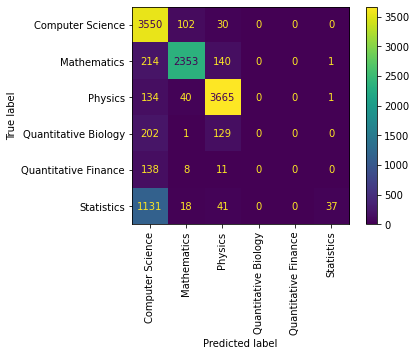

In [65]:
plot_confusion_matrix(mnb, X_vec, y_train)
plt.xticks(rotation=90)
plt.show();